In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the necessary files
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [3]:
with open('./pickle/lapZeroBrownSpot.pickle', 'rb') as handle:
    lapZeroBrownSpot = pickle.load(handle)
    
with open('./pickle/lapZeroHealthy.pickle', 'rb') as handle:
    lapZeroHealthy = pickle.load(handle)
    
with open('./pickle/lapZeroHispa.pickle', 'rb') as handle:
    lapZeroHispa = pickle.load(handle)
    
with open('./pickle/lapZeroLeafBlast.pickle', 'rb') as handle:
    lapZeroLeafBlast = pickle.load(handle)

with open('./pickle/lapOneBrownSpot.pickle', 'rb') as handle:
    lapOneBrownSpot = pickle.load(handle)
    
with open('./pickle/lapOneHealthy.pickle', 'rb') as handle:
    lapOneHealthy = pickle.load(handle)
    
with open('./pickle/lapOneHispa.pickle', 'rb') as handle:
    lapOneHispa = pickle.load(handle)
    
with open('./pickle/lapOneLeafBlast.pickle', 'rb') as handle:
    lapOneLeafBlast = pickle.load(handle)
    
with open('./pickle/lapTwoBrownSpot.pickle', 'rb') as handle:
    lapTwoBrownSpot = pickle.load(handle)
    
with open('./pickle/lapTwoHealthy.pickle', 'rb') as handle:
    lapTwoHealthy = pickle.load(handle)
    
with open('./pickle/lapTwoHispa.pickle', 'rb') as handle:
    lapTwoHispa = pickle.load(handle)
    
with open('./pickle/lapTwoLeafBlast.pickle', 'rb') as handle:
    lapTwoLeafBlast = pickle.load(handle)
    
with open('./pickle/areaBrownSpot.pickle', 'rb') as handle:
    areaBrownSpot = pickle.load(handle)
    
with open('./pickle/areaHealthy.pickle', 'rb') as handle:
    areaHealthy = pickle.load(handle)
    
with open('./pickle/areaHispa.pickle', 'rb') as handle:
    areaHispa = pickle.load(handle)
    
with open('./pickle/areaLeafBlast.pickle', 'rb') as handle:
    areaLeafBlast = pickle.load(handle)
    
with open('./pickle/perimeterBrownSpot.pickle', 'rb') as handle:
    perimeterBrownSpot = pickle.load(handle)
    
with open('./pickle/perimeterHealthy.pickle', 'rb') as handle:
    perimeterHealthy = pickle.load(handle)
    
with open('./pickle/perimeterHispa.pickle', 'rb') as handle:
    perimeterHispa = pickle.load(handle)
    
with open('./pickle/perimeterLeafBlast.pickle', 'rb') as handle:
    perimeterLeafBlast = pickle.load(handle)

In [4]:
features = []

target = []

for i in range(523):
    features.append([lapZeroBrownSpot[i], lapOneBrownSpot[i], lapTwoBrownSpot[i], areaBrownSpot[i], perimeterBrownSpot[i]])
    target.append(0)
    features.append([lapZeroHealthy[i], lapOneHealthy[i], lapTwoHealthy[i], areaHealthy[i], perimeterHealthy[i]])
    target.append(1)
    features.append([lapZeroHispa[i], lapOneHispa[i], lapTwoHispa[i], areaHispa[i], perimeterHispa[i]])
    target.append(2)
    features.append([lapZeroLeafBlast[i], lapOneLeafBlast[i], lapTwoLeafBlast[i], areaLeafBlast[i], perimeterLeafBlast[i]])
    target.append(3)

In [5]:
print(type(features))
print(type(target))

<class 'list'>
<class 'list'>


In [6]:
features = np.array(features)
target = np.array(target)

In [7]:
print(type(features))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
dataframe = pd.DataFrame({
    'laplacian zero':features[:,0],
    'laplacian one':features[:,1],
    'laplacian two':features[:,2],
    'area':features[:,3],
    'perimeter':features[:, 4],
    'class':target[:]
})

In [19]:
dataframe

,laplacian zero,laplacian one,laplacian two,area,perimeter,class
0,0.099031,0.049977,0.148362,0.000001,0.000024,0
1,0.024356,0.031874,0.190584,0.257252,0.070443,1
2,0.304121,0.081439,0.320941,0.438996,0.101491,2
3,0.026086,0.145992,0.166664,0.035548,0.134743,3
4,0.255132,0.133382,0.366860,0.000062,0.000680,0
...,...,...,...,...,...,...
2087,0.064451,0.159072,0.024322,0.002420,0.006402,3
2088,0.094461,0.143308,0.020287,0.000123,0.001112,0
2089,0.569517,0.191904,0.028097,0.000006,0.000160,1
2090,0.123071,0.084630,0.193976,0.000041,0.079736,2


In [10]:
# minimum maximum value before normalization
column = 'area'
max_value = dataframe[column].max()
min_value = dataframe[column].min()

# Print the results
print(max_value)
print(min_value)

3110861.0
0.0


In [11]:
# normalize the dataset
features = dataframe.drop('class', axis=1)
columnsName = features.columns
columnsName = columnsName.tolist()
scaler = MinMaxScaler()
dataframe[columnsName] = scaler.fit_transform(dataframe[columnsName])

In [12]:
# minimum maximum value before normalization
column = 'area'
max_value = dataframe[column].max()
min_value = dataframe[column].min()

# Print the results
print(max_value)
print(min_value)

1.0
0.0


In [13]:
features = dataframe.drop(columns = ['class'])
target = dataframe['class']

In [23]:
lasso = Lasso()

allPossibleAlpha = [0.01, 0.1, 1.0]


param_grid = {'alpha': allPossibleAlpha}

scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(lasso, param_grid, scoring=scorer, cv=5)

# Fit the GridSearchCV to the data
grid_search.fit(features, target)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_
print("Best alpha: ", best_alpha)

Best alpha:  0.01


In [24]:
lasso1 = Lasso(alpha=best_alpha, random_state=42)
lasso1.fit(features, target)

Lasso(alpha=0.01, random_state=42)

In [25]:
print(lasso1.coef_)

[-0.45651531 -1.53913115  0.48224211  0.          0.        ]


In [26]:
print(features.columns)

Index(['laplacian zero', 'laplacian one', 'laplacian two', 'area',
       'perimeter'],
      dtype='object')


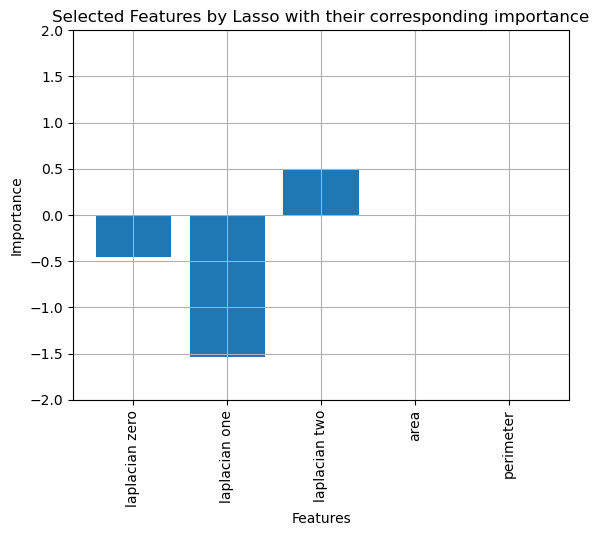

In [27]:
# plotting the features names and their corresponding importance assigned by lasso 
plt.bar(features.columns, lasso1.coef_)
plt.xticks(rotation=90)
plt.grid()
plt.title("Selected Features by Lasso with their corresponding importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(-2, 2)
plt.show()